### Data Science Game 2017

Data fields

    media_id - identifiant of the song listened by the user
    album_id - identifiant of the album of the song
    media_duration - duration of the song
    user_gender -  gender of the user
    user_id -  anonymized id of the user
    context_type - type of content where the song was listened: playlist, album ...
    release_date - release date of the song with the format YYYYMMDD
    ts_listen - timestamp of the listening in UNIX time
    platform_name - type of os
    platform_family - type of device
    user_age - age of the user
    listen_type - if the songs was listened in a flow or not
    artist_id - identifiant of the artist of the song
    genre_id - identifiant of the genre of the song
    is_listened - 1 if the track was listened, 0 otherwise


In [120]:
import pandas as pd

In [121]:
df_train = pd.read_csv("../data/train_data3.csv", nrows=3000)
df_test = pd.read_csv("../data/test_data3.csv")

### Arrumando coisas que vieram erradas

In [122]:
df_test = df_test.set_value(df_test[df_test["listen_type"] == 0].index, "listen_type", 1)

In [123]:
df_train.columns

Index([u'Unnamed: 0', u'genre_id', u'ts_listen', u'media_id', u'album_id',
       u'context_type', u'release_date', u'platform_name', u'platform_family',
       u'media_duration', u'listen_type', u'user_gender', u'user_id',
       u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [124]:
to_drop = ['Unnamed: 0']
df_train.drop(to_drop, axis = 1,inplace=True)
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,diff_ts_listen_AND_release_date_M,diff_ts_listen_AND_release_date_Y,release_date_DAY,release_date_MONTH,release_date_YEAR,ts_listen_DAY_OF_WEEK,ts_listen_PERIOD_OF_DAY,user_age_group,diff_user_song_age,media_decade
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,151.100000,12.419178,4,7,2004,3,0,2,16.580822,7
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,130.900000,10.758904,1,3,2006,2,2,2,19.241096,7
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,28.633333,2.353425,14,7,2014,5,0,2,26.646575,8
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,195.700000,16.084932,30,10,2000,5,0,2,13.915068,6
4,7,2016-11-05 16:02:54,542335,71718,0,2008-02-15 00:00:00,0,0,3.0,0,...,106.200000,8.728767,15,2,2008,5,1,1,15.271233,7


In [125]:
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

Series([], dtype: int64)

### Append User Specific

In [126]:
df_user = pd.read_csv("../data/nmidia_feats.csv", sep=";")
pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]
#df_user = df_user.drop(["nmidia_with_flow_listened_PROP", "nmidia_regular_listened_PROP", "nmidia_PROP_diff"], axis=1)
df_user.columns.values

array(['user_id', 'nmidia_regular_listened', 'nmidia_with_flow_listened',
       'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

In [127]:
pd.isnull(df_user).sum()[pd.isnull(df_user).sum() > 0]

nmidia_with_flow_listened_PROP    3947
nmidia_regular_listened_PROP       429
nmidia_PROP_diff                  4400
dtype: int64

In [128]:
df_train = pd.merge(df_train, df_user, on="user_id")
df_test = pd.merge(df_test, df_user, on="user_id")
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,25471,2016-12-01 11:00:15,222606,41774,12,2004-07-04 00:00:00,1,0,4.0,0,...,2,16.580822,7,41,48,57,71,0.676056,0.719298,0.939883
1,25571,2016-11-30 20:25:35,250467,43941,0,2006-03-01 00:00:00,2,1,3.0,0,...,2,19.241096,7,22,0,37,1,0.000000,0.594595,0.000000
2,16,2016-11-19 11:59:13,305197,48078,1,2014-07-14 00:00:00,2,1,2.0,1,...,2,26.646575,8,180,75,181,77,0.974026,0.994475,0.979437
3,7,2016-11-26 07:21:38,900502,71521,0,2000-10-30 00:00:00,0,0,4.0,0,...,2,13.915068,6,303,142,476,241,0.589212,0.636555,0.925626
4,107695,2016-12-01 04:13:06,1345183,138895,1,2006-11-28 00:00:00,0,0,5.0,1,...,2,19.983562,7,303,142,476,241,0.589212,0.636555,0.925626


In [129]:
df_train.replace([np.inf, -np.inf], np.nan, inplace=True)

### Check for NA
#### Ver depois sobre o user_age_group!

In [130]:
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]

nmidia_with_flow_listened_PROP    107
nmidia_regular_listened_PROP       15
nmidia_PROP_diff                  123
dtype: int64

In [131]:
df_train.dropna(inplace=True)

In [132]:
y = df_train["is_listened"].values

In [133]:
categorical_cols = ["genre_id",
                   "media_id",
                   "album_id",
                   "context_type",
                   "release_date",
                   "platform_name",
                   "platform_family",
                   "listen_type",
                   "user_gender",
                   "user_id",
                   "artist_id",
                   "user_age"]

### Let's inspect the categorical variables!

In [134]:
for col in categorical_cols:
    print("{}: {}".format(col, len(df_train[col].unique())))

genre_id: 32
media_id: 268
album_id: 81
context_type: 34
release_date: 74
platform_name: 3
platform_family: 3
listen_type: 2
user_gender: 2
user_id: 1248
artist_id: 96
user_age: 13


### Strategy
1. Apply onehot to categorical with few classes
2. Rank categories to artist id
3. target encoder for context and genre
4. discard media, album, release date and user_id

In [135]:
from greenpyce.feature_engineering import TargetEncoder
from greenpyce.feature_engineering import onehot
from greenpyce.feature_engineering import RankCategorical
from greenpyce.feature_engineering import LabelCount

In [136]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family',
       'media_duration', 'listen_type', 'user_gender', 'user_id',
       'artist_id', 'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'ts_listen_DAY_OF_WEEK',
       'ts_listen_PERIOD_OF_DAY', 'user_age_group', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff'], dtype=object)

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'genre_id', u'ts_listen', u'media_id',
       u'album_id', u'context_type', u'release_date', u'platform_name',
       u'platform_family', u'media_duration', u'listen_type', u'user_gender',
       u'user_id', u'artist_id', u'user_age', u'is_listened', u'text', u'year',
       u'diff_ts_listen_AND_release_date_D',
       u'diff_ts_listen_AND_release_date_M',
       u'diff_ts_listen_AND_release_date_Y', u'release_date_DAY',
       u'release_date_MONTH', u'release_date_YEAR', u'ts_listen_DAY_OF_WEEK',
       u'ts_listen_PERIOD_OF_DAY', u'user_age_group', u'diff_user_song_age',
       u'media_decade'],
      dtype='object')

In [137]:
cols_for_target_encoder = ["genre_id", 
                           "context_type", 
                           "user_id", 
                           "media_id", 
                           "listen_type"]

cols_for_onehot = ["platform_name", 
                   "platform_family", 
                   "listen_type", 
                   "user_gender", 
                   "user_age_group", 
                   "ts_listen_DAY_OF_WEEK",
                  "ts_listen_PERIOD_OF_DAY"]

cols_for_rank = ["artist_id"]
                #"media_decade"]


target = "is_listened"

In [138]:
te = TargetEncoder(cols_for_target_encoder, "is_listened")

In [139]:
te.fit(df_train)

In [140]:
te.transform(df_train)
te.transform(df_test)

In [141]:
rc = RankCategorical(cols_for_rank)
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [142]:
rc = RankCategorical(["media_decade"])
rc.fit(df_train)
rc.transform(df_train)
rc.transform(df_test)

In [143]:
# lc = RankCategorical(cols_for_count)
# lc.fit(df_train)
# lc.transform(df_train)
# lc.transform(df_test)

In [144]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,...,user_age_group,diff_user_song_age,media_decade,nmidia_regular_listened,nmidia_with_flow_listened,nmidia_regular,nmidia_with_flow,nmidia_with_flow_listened_PROP,nmidia_regular_listened_PROP,nmidia_PROP_diff
0,0.000000,2016-12-01 11:00:15,0.0,41774,0.729730,2004-07-04 00:00:00,1,0,4.0,0.668147,...,2,16.580822,2,41,48,57,71,0.676056,0.719298,0.939883
1,1.000000,2016-11-30 20:25:35,1.0,43941,0.627104,2006-03-01 00:00:00,2,1,3.0,0.668147,...,2,19.241096,2,22,0,37,1,0.000000,0.594595,0.000000
2,1.000000,2016-11-19 11:59:13,1.0,48078,0.585062,2014-07-14 00:00:00,2,1,2.0,0.621395,...,2,26.646575,4,180,75,181,77,0.974026,0.994475,0.979437
3,0.624172,2016-11-26 07:21:38,0.0,71521,0.627104,2000-10-30 00:00:00,0,0,4.0,0.668147,...,2,13.915068,3,303,142,476,241,0.589212,0.636555,0.925626
4,0.714286,2016-12-01 04:13:06,1.0,138895,0.585062,2006-11-28 00:00:00,0,0,5.0,0.621395,...,2,19.983562,2,303,142,476,241,0.589212,0.636555,0.925626


In [145]:
df_train = onehot(df_train, cols_for_onehot)
df_test = onehot(df_test, cols_for_onehot)

In [146]:
df_train.head()

,genre_id,ts_listen,media_id,album_id,context_type,release_date,media_duration,user_id,artist_id,user_age,...,user_age_group_2,ts_listen_DAY_OF_WEEK_1,ts_listen_DAY_OF_WEEK_2,ts_listen_DAY_OF_WEEK_3,ts_listen_DAY_OF_WEEK_4,ts_listen_DAY_OF_WEEK_5,ts_listen_DAY_OF_WEEK_6,ts_listen_PERIOD_OF_DAY_1,ts_listen_PERIOD_OF_DAY_2,ts_listen_PERIOD_OF_DAY_3
0,0.000000,2016-12-01 11:00:15,0.0,41774,0.729730,2004-07-04 00:00:00,4.0,0.000000,89,29,...,1,0,0,1,0,0,0,0,0,0
1,1.000000,2016-11-30 20:25:35,1.0,43941,0.627104,2006-03-01 00:00:00,3.0,1.000000,96,30,...,1,0,1,0,0,0,0,0,1,0
2,1.000000,2016-11-19 11:59:13,1.0,48078,0.585062,2014-07-14 00:00:00,2.0,1.000000,70,29,...,1,0,0,0,0,1,0,0,0,0
3,0.624172,2016-11-26 07:21:38,0.0,71521,0.627104,2000-10-30 00:00:00,4.0,0.666667,57,30,...,1,0,0,0,0,1,0,0,0,0
4,0.714286,2016-12-01 04:13:06,1.0,138895,0.585062,2006-11-28 00:00:00,5.0,0.666667,28,30,...,1,0,0,1,0,0,0,0,0,1


In [147]:
#df_train = rank_categorical(df_train, cols_for_rank)

In [148]:
df_train.columns.values

array(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'media_duration', 'user_id', 'artist_id',
       'user_age', 'is_listened', 'text', 'year',
       'diff_ts_listen_AND_release_date_D',
       'diff_ts_listen_AND_release_date_M',
       'diff_ts_listen_AND_release_date_Y', 'release_date_DAY',
       'release_date_MONTH', 'release_date_YEAR', 'diff_user_song_age',
       'media_decade', 'nmidia_regular_listened',
       'nmidia_with_flow_listened', 'nmidia_regular', 'nmidia_with_flow',
       'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP',
       'nmidia_PROP_diff', 'platform_name_1', 'platform_name_2',
       'platform_family_1', 'platform_family_2',
       'listen_type_0.668146503885', 'user_gender_1', 'user_age_group_1',
       'user_age_group_2', 'ts_listen_DAY_OF_WEEK_1',
       'ts_listen_DAY_OF_WEEK_2', 'ts_listen_DAY_OF_WEEK_3',
       'ts_listen_DAY_OF_WEEK_4', 'ts_listen_DAY_OF_WEEK_5',
       'ts_listen_DAY_OF_WEE

In [149]:
### Drop
to_drop = ['ts_listen', 'album_id', 'release_date', 'artist_id', "year", "text"]
df_train.drop(to_drop, axis = 1,inplace=True)
df_test.drop(to_drop, axis = 1,inplace=True)

In [150]:
# to_drop = ["year", "text"]
# df_train.drop(to_drop, axis = 1,inplace=True)
pd.isnull(df_train).sum()[pd.isnull(df_train).sum() > 0]
#pd.isnull(df_test).sum()[pd.isnull(df_test).sum() > 0]

Series([], dtype: int64)

In [151]:
features = [col for col in df_train.columns.values if col != target]
features

['genre_id',
 'media_id',
 'context_type',
 'media_duration',
 'user_id',
 'user_age',
 'diff_ts_listen_AND_release_date_D',
 'diff_ts_listen_AND_release_date_M',
 'diff_ts_listen_AND_release_date_Y',
 'release_date_DAY',
 'release_date_MONTH',
 'release_date_YEAR',
 'diff_user_song_age',
 'media_decade',
 'nmidia_regular_listened',
 'nmidia_with_flow_listened',
 'nmidia_regular',
 'nmidia_with_flow',
 'nmidia_with_flow_listened_PROP',
 'nmidia_regular_listened_PROP',
 'nmidia_PROP_diff',
 'platform_name_1',
 'platform_name_2',
 'platform_family_1',
 'platform_family_2',
 'listen_type_0.668146503885',
 'user_gender_1',
 'user_age_group_1',
 'user_age_group_2',
 'ts_listen_DAY_OF_WEEK_1',
 'ts_listen_DAY_OF_WEEK_2',
 'ts_listen_DAY_OF_WEEK_3',
 'ts_listen_DAY_OF_WEEK_4',
 'ts_listen_DAY_OF_WEEK_5',
 'ts_listen_DAY_OF_WEEK_6',
 'ts_listen_PERIOD_OF_DAY_1',
 'ts_listen_PERIOD_OF_DAY_2',
 'ts_listen_PERIOD_OF_DAY_3']

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.2)

In [154]:
#X_train.applymap(lambda x : math.isnan(x))

In [155]:
pd.isnull(X_train.replace([np.inf, -np.inf], np.nan)).sum()[pd.isnull(X_train.replace([np.inf, -np.inf], np.nan)).sum() > 0]

Series([], dtype: int64)

### Feature Selection

In [156]:
from sklearn import feature_selection
all_features = features
function_rule_selection = feature_selection.f_classif
alpha_cutoff = 0.01

selection_rule = feature_selection.SelectFdr(function_rule_selection, alpha_cutoff)
selection_rule.fit(X_train, y_train);

all_pvalues = list(filter(lambda x: pd.notnull(x[0]), zip(selection_rule.pvalues_, all_features)))
#print(all_pvalues)
filtered_pvalues = list(filter(lambda x: x[0]<=alpha_cutoff, all_pvalues))
#print(filtered_pvalues)
all_select_features = list(map(lambda x: x[1], filtered_pvalues))

print("{0} selected variables from {1}, {2:.2f}%".format(len(all_select_features), 
                                                        len(all_features), 
                                                        len(filtered_pvalues)*100/float(len(all_features))))
print(all_select_features)
#print(filtered_pvalues)

18 selected variables from 38, 47.37%
['genre_id', 'media_id', 'context_type', 'user_id', 'release_date_DAY', 'release_date_MONTH', 'media_decade', 'nmidia_regular_listened', 'nmidia_with_flow_listened', 'nmidia_with_flow', 'nmidia_with_flow_listened_PROP', 'nmidia_regular_listened_PROP', 'nmidia_PROP_diff', 'platform_name_2', 'platform_family_1', 'platform_family_2', 'user_gender_1', 'ts_listen_DAY_OF_WEEK_4']


In [157]:
feaures = all_select_features
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size = 0.4)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5)

In [158]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def complete_report(y_test, y_pred):
    print("*********************************")
    print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))
    print("Precision: {0}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall: {0}".format(metrics.recall_score(y_test, y_pred)))
    print("F1-Score: {0}".format(metrics.f1_score(y_test, y_pred)))
    conf_m = confusion_matrix(y_test, y_pred)
    print(conf_m)
    try: 
        print("Roc Area: {0}".format(metrics.roc_auc_score(y_test, y_pred))) 
        roc_curve_label(y_test, y_pred)
    except:
        print("--")
    print("*********************************")
    
    return metrics.roc_auc_score(y_test, y_pred)
        
def roc_curve_label(y_test, y_pred):
    plt.figsize=(10,6)
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='RT + LR')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [159]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

0.822916666667
*********************************
Accuracy: 0.82
Precision: 0.855191256831
Recall: 0.864640883978
F1-Score: 0.85989010989
[[161  53]
 [ 49 313]]
Roc Area: 0.808488666288


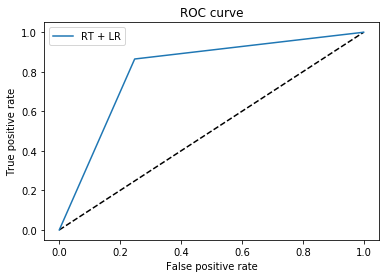

*********************************


0.80848866628801563

In [160]:
print(model.score(X_test, y_test))
complete_report(y_test, model.predict(X_test))

acc: 0.70345496362865445  
roc: 0.6912675674785278

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
confusion_matrix(y_test, model.predict(X_test))

array([[161,  53],
       [ 49, 313]])

In [174]:
counts = df_train[target].value_counts()
class_ratio = counts[1] / np.sum(counts.values) 

In [175]:
import xgboost as xgb
from time import time

start = time()
xg_train = xgb.DMatrix(X_train, label=y_train, missing=np.NaN)
xg_test = xgb.DMatrix(X_test, label=y_test, missing=np.NaN)
xg_val = xgb.DMatrix(X_val, label=y_val, missing=np.NaN)
param = {'max_depth':52, 
         'eta':0.2, 
         'silent':0, 
         'objective':'multi:softprob', 
         "booster": "gbtree", 
         "max_delta_step":1,
         "alpha": 5,
         "lambda": 2,
         "scale_pos_weight": class_ratio,
         "eval_metric": "mlogloss"}

### Objectives
## 'binary:logistic'
## 'multi:softprob'
param['num_class'] = 2
param["min_child_weight"] = 1
param["colsample_bytree"] = 1
num_round = 33

watchlist = [(xg_train,'train'), (xg_val,'validation')]


bst = xgb.train(param, 
                xg_train, 
                num_round, 
                watchlist,
                early_stopping_rounds=5)

yprob = bst.predict( xg_test ).reshape( y_test.shape[0], 2)
print(yprob[0])

print('Tempo de execução: {0}m{1}s'.format(int((time()-start)/60),
             int((time()-start)%60 )))

[0]	train-mlogloss:0.572134	validation-mlogloss:0.572147
Multiple eval metrics have been passed: 'validation-mlogloss' will be used for early stopping.

Will train until validation-mlogloss hasn't improved in 5 rounds.
[1]	train-mlogloss:0.489923	validation-mlogloss:0.490313
[2]	train-mlogloss:0.431299	validation-mlogloss:0.433349
[3]	train-mlogloss:0.384294	validation-mlogloss:0.39014
[4]	train-mlogloss:0.34852	validation-mlogloss:0.356785
[5]	train-mlogloss:0.320922	validation-mlogloss:0.331106
[6]	train-mlogloss:0.297802	validation-mlogloss:0.31167
[7]	train-mlogloss:0.279914	validation-mlogloss:0.295359
[8]	train-mlogloss:0.264896	validation-mlogloss:0.283964
[9]	train-mlogloss:0.252097	validation-mlogloss:0.275556
[10]	train-mlogloss:0.242663	validation-mlogloss:0.2665
[11]	train-mlogloss:0.234142	validation-mlogloss:0.262131
[12]	train-mlogloss:0.226188	validation-mlogloss:0.254871
[13]	train-mlogloss:0.219802	validation-mlogloss:0.250313
[14]	train-mlogloss:0.213951	validation-m

In [177]:
yprob = bst.predict( xg_test ).reshape( y_test.shape[0], 2)

[[162  52]
 [ 35 327]]
*********************************
Accuracy: 0.85
Precision: 0.862796833773
Recall: 0.903314917127
F1-Score: 0.882591093117
[[162  52]
 [ 35 327]]
Roc Area: 0.830162131461


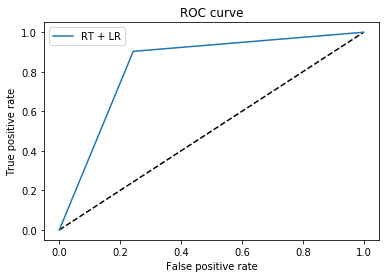

*********************************


0.83016213146073214

In [184]:
y_pred = [1 if y[0] <= 0.5 else 0 for y in yprob]
print(metrics.confusion_matrix(y_test, y_pred))

complete_report(y_test, y_pred)

*********************************
Accuracy: 0.82
Precision: 0.855191256831
Recall: 0.864640883978
F1-Score: 0.85989010989
[[161  53]
 [ 49 313]]
Roc Area: 0.808488666288


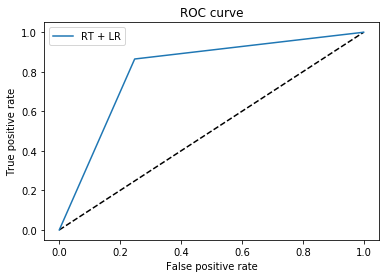

*********************************


0.80848866628801563

In [176]:
complete_report(y_test, model.predict(X_test))

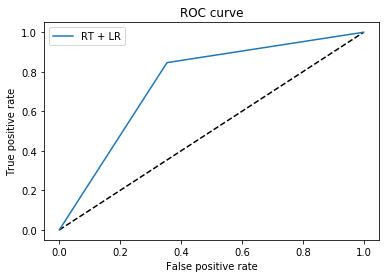

In [193]:
roc_curve_label(y_test, model.predict(X_test))

In [194]:
import gzip
import csv
import numpy as np

def build_kaggle_submission(preds, filename="my_submission"):
    """
    Build a compressed Kaggle Submission
    
    preds: array with predictions
    """
    with gzip.open(filename + '.csv.gz', 'wt') as outf:
        fo = csv.writer(outf, lineterminator='\n')
        fo.writerow(["sample_id", "is_listened"])       
        for i, pred in enumerate(preds):
            fo.writerow([i, pred])

In [195]:
p = model.predict_proba(df_test[features])

In [196]:
p = p[:, 1]

In [197]:
build_kaggle_submission(p, "random_forest_user_feats")

In [198]:
import sys
print(sys.getsizeof(df_train) / 1e6)
print(sys.getsizeof(df_test) / 1e6)
print(sys.getsizeof(model) / 1e6)

1242.442859
3.684862
6.4e-05


### GridSearch and XGBoost

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Reshape
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
import numpy as np

In [ ]:
model = Sequential()
model.add(Embedding(df_train["album_id"].max(), 64, input_length=10))
model.add(Dense(1, activation="relu"))
# the model will take as input an integer matrix of size (batch, input_length).
# the largest integer (i.e. word index) in the input should be no larger than 999 (vocabulary size).
# now model.output_shape == (None, 10, 64), where None is the batch dimension.

input_array = np.random.randint(1000, size=(32, 10))
print(input_array)
model.compile('rmsprop', 'mse')
model.fit(input_array, np.array([1]))

output_array = model.predict(input_array)
#assert output_array.shape == (32, 10, 64)
print(output_array)

In [ ]:
df_train["album_id"].max()

In [ ]:
output_array